In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('MountainCar-v0')
env.reset()

array([-0.57385275,  0.        ])

In [2]:
def get_num_states(high, low):
    states = (high - low) * np.array([10, 100])
    return np.round(states).astype(int)

In [3]:
def q_learning(env, learning, discount, epsilon, min_eps, episodes):
    
    # Calculate size of discretized state space
    num_states = get_num_states(env.observation_space.high, env.observation_space.low)
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize rewards variables
    reward_list = []
    avg_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q-learning algorithm
    for i in range(episodes):
        # Initialize params
        done = False
        total_reward = 0
        reward = 0
        state = env.reset()
        
        # Discretize state
        state_adj = get_num_states(state, env.observation_space.low)
    
        while not done:   
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward, determine if done
            state_2, reward, done, info = env.step(action) 
            
            # Discretize state 2
            state_2_adj = get_num_states(state_2, env.observation_space.low)
            
            # Check for terminal states
            if done and state_2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                q_loss = reward + discount * np.max(Q[state_2_adj[0], state_2_adj[1]]) - Q[state_adj[0], state_adj[1],action]
                Q[state_adj[0], state_adj[1],action] += learning * q_loss
                                     
            # Update variables
            total_reward += reward
            state_adj = state_2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(total_reward)
        
        if (i+1) % 100 == 0:
            avg_reward = np.mean(reward_list)
            avg_reward_list.append(avg_reward)
            reward_list = []
            print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
    env.close()
    
    return avg_reward_list

In [4]:
# Run Q-learning algorithm
rewards = q_learning(env, 0.2, 0.9, 0.8, 0, 5000)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -199.74
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -199.98

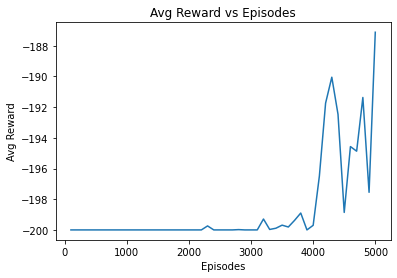

In [5]:
# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Avg Reward')
plt.title('Avg Reward vs Episodes')
plt.show() 